## Tách Từ

Nếu nhóm làm với Tiếng Việt thì yêu cầu bắt buộc là chọn 40-60 câu (nhóm 2 người) và tách từ thủ công tiếng Việt cho tất cả từ có trong tập câu đó.

Cài đặt một phương pháp tách từ để thử nghiệm trên tập câu đã chọn và so sánh với kết quả của một thư viện tách từ trên tập câu đó.

### Sử dụng module ViTokenizer của thư Viện pyvi

### Sử dụng thư viện Vncorenlp

In [1]:
%pip install py_vncorenlp

Note: you may need to restart the kernel to use updated packages.


In [2]:
import py_vncorenlp

py_vncorenlp.download_model(save_dir=r'C:\Users\LONG\AppData\Local\Programs\Python\Python39\Lib\site-packages\py_vncorenlp')



The VnCoreNLP model is already!


In [3]:
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=r'C:\Users\LONG\AppData\Local\Programs\Python\Python39\Lib\site-packages\py_vncorenlp')

In [4]:
string = 'Các cặp đôi hay ngồi ghế đá công cộng tại công viên.'
print(rdrsegmenter.word_segment(string))

['Các cặp đôi hay ngồi ghế đá công_cộng tại công_viên .']


In [5]:
NguLieu = []

In [6]:
with open(r'P:\CS221\Multi-Text-classification\NguLieu\NguLieu.txt','r',encoding="utf-8") as f:
    word= f.readlines()
    word = ''.join(word)
    NguLieu.append(word)

In [7]:
NguLieu


['Một con mèo đang chạy.\nCác bạn nam đang chơi bóng đá.\nCô ấy đi bộ trên vỉa hè.\nBạn của tôi không giỏi về tiếng Anh.\nBài tập này quá khó.\nTôi muốn một mức lương cao.\nNước uống ở UIT thì miễn phí.\nBạn nên tham gia câu lạc bộ của tôi.\nNhiều động vật sống trên cây này.\nKhông một ai biết về anh ấy.\nRác cần được tái chế.\nAnh ấy đang mặc quần áo công sở.\nAnh ấy đang chơi cờ vua .\nTôi nghĩ anh ấy giỏi tiết kiệm tiền.\nTôi đau bụng.\nBạn có muốn đi chợ không?.\nTôi nói thật với bạn là tôi quý bạn nhất, nên là mùa World Cup này bạn cho tôi mượn năm triệu với cả xe máy của bạn nhé, tôi hứa là tôi sẽ trả.\nThời tiết hôm nay quá nóng.\nMùa hè xanh là một chương trình tình nguyện.\nThành phố Thủ Đức rất phát triển.\nSông Đồng Nai là một con sông rất lớn.\nChúng ta nên tuân thủ pháp luật.\nBài tập tiếng anh này khó quá.\nAi có thể làm được bài này thì đưa tay lên.\nAnh chỉ yêu mình em thôi.\nAnh thề anh không làm gì đâu.\nSinh viên đại học quốc gia ý thức rất kém.\nHồ đá rất đẹp nhưng 

Tach Tu voi VncoreNLP

In [8]:
Data = ''.join(NguLieu)
Vncorenlp_NguLieu = rdrsegmenter.word_segment(Data)
Vncorenlp_NguLieu = [''.join(Vncorenlp_NguLieu)]
Vncorenlp_NguLieu

['Một con mèo đang chạy .Các bạn nam đang chơi bóng_đá .Cô ấy đi bộ trên vỉa_hè .Bạn của tôi không giỏi về tiếng Anh .Bài_tập này quá khó .Tôi muốn một mức lương cao .Nước uống ở UIT thì miễn_phí .Bạn nên tham_gia câu_lạc_bộ của tôi .Nhiều động_vật sống trên cây này .Không một ai biết về anh ấy .Rác cần được tái_chế .Anh ấy đang mặc quần_áo công_sở .Anh ấy đang chơi cờ_vua .Tôi nghĩ anh ấy giỏi tiết_kiệm tiền .Tôi đau bụng .Bạn có muốn đi chợ không ?.Tôi nói thật với bạn là tôi quý bạn nhất , nên là mùa World_Cup này bạn cho tôi mượn năm triệu với cả xe_máy của bạn nhé , tôi hứa là tôi sẽ trả .Thời_tiết hôm_nay quá nóng .Mùa hè xanh là một chương_trình tình_nguyện .Thành_phố Thủ_Đức rất phát_triển .Sông Đồng_Nai là một con sông rất lớn .Chúng_ta nên tuân_thủ pháp_luật .Bài_tập tiếng anh này khó quá .Ai có_thể làm được bài này thì đưa tay lên .Anh chỉ yêu mình em thôi .Anh thề anh không làm gì đâu .Sinh_viên đại_học quốc_gia ý_thức rất kém .Hồ đá rất đẹp nhưng cũng rất đáng sợ .Các cặp 

Tách từ với Longest matching

In [9]:
import re
import unicodedata as ud
import ast
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    
    patterns = []
    patterns.extend([word, non_word, digits])
    patterns = f"({'|'.join(patterns)})"
    
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

def load_n_grams(path):
    with open(path, encoding='utf8') as f:
        words = f.read()
        words = ast.literal_eval(words)
    return words

def longest_matching(sentence, bi_grams, tri_grams):
    syllables = syllablize(sentence)
    syl_len = len(syllables)
    
    curr_id = 0
    word_list = []
    done = False
    
    while (curr_id < syl_len) and (not done):
        curr_word = syllables[curr_id]
        if curr_id >= syl_len - 1:
            word_list.append(curr_word)
            done = True
        else:
            next_word = syllables[curr_id + 1]
            pair_word = ' '.join([curr_word.lower(), next_word.lower()])
            if curr_id >= (syl_len - 2):
                if pair_word in bi_grams:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
            else:
                next_next_word = syllables[curr_id + 2]
                triple_word = ' '.join([pair_word, next_next_word.lower()])
                if triple_word in tri_grams:
                    word_list.append('_'.join([curr_word, next_word, next_next_word]))
                    curr_id += 3
                elif pair_word in bi_grams:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
    return word_list

bi_grams = load_n_grams(r'P:\CS221\Multi-Text-classification\N_gram\bi_grams.txt')
tri_grams = load_n_grams(r'P:\CS221\Multi-Text-classification\N_gram\tri_grams.txt')


In [10]:
longest_matching('Các cặp đôi hay ngồi ghế đá công cộng tại công viên.', bi_grams, tri_grams)

['Các',
 'cặp',
 'đôi',
 'hay',
 'ngồi',
 'ghế',
 'đá',
 'công_cộng',
 'tại',
 'công_viên',
 '.']

Tách từ Thủ Công

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

ThuCong = []
with open(r'P:\CS221\Multi-Text-classification\NguLieu\ThuCong_2.txt','r',encoding="utf-8") as f:
    word= f.readlines()
    word = ''.join(word)
    ThuCong.append(word)

In [12]:
ThuCong

['Một con mèo đang chạy.\nCác bạn nam đang chơi bóng_đá.\nCô ấy đi bộ trên vỉa_hè.\nBạn của tôi không giỏi về tiếng Anh.\nBài_tập này quá khó.\nTôi muốn một mức lương cao.\nNước uống ở UIT thì miễn_phí.\nBạn nên tham_gia câu_lạc_bộ của tôi.\nNhiều động_vật sống trên cây này.\nKhông một ai biết về anh ấy.\nRác cần được tái_chế.\nAnh ấy đang mặc quần_áo công_sở.\nAnh ấy đang chơi cờ_vua .\nTôi nghĩ anh ấy giỏi tiết_kiệm tiền.\nTôi đau bụng.\nBạn có muốn đi chợ không?.\nTôi nói thật với bạn là tôi quý bạn nhất, nên là mùa World_Cup này bạn cho tôi mượn năm triệu với cả xe_máy của bạn nhé, tôi hứa là tôi sẽ trả.\nThời_tiết hôm nay quá nóng.\nMùa hè xanh là một chương_trình tình_nguyện.\nThành_phố Thủ_Đức rất phát triển.\nSông Đồng_Nai là một con sông rất lớn.\nChúng ta nên tuân_thủ pháp_luật.\nBài_tập tiếng anh này khó quá.\nAi có_thể làm được bài này thì đưa tay lên.\nAnh chỉ yêu mình em thôi.\nAnh thề anh không làm gì đâu.\nSinh_viên đại_học quốc_gia ý thức rất kém.\nHồ đá rất đẹp nhưng 

### Đánh giá kết quả tách từ

# Đồ Án Riêng

### Load các thư viện cần thiết

In [13]:
import pyvi
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import gensim
import os

In [14]:
def GetData_from_Dataset(Data_path):
    content = []
    label = []
    subfolder_name = os.listdir(Data_path)
    for subFoldernameItem in tqdm(subfolder_name):
        files_path = os.listdir(os.path.join(Data_path,subFoldernameItem))
        for file_path in tqdm(files_path):
            with open(os.path.join(Data_path, subFoldernameItem,file_path),'r',encoding="utf-16") as f:
                word= f.readlines()
                word= ' '.join(word)
                word= gensim.utils.simple_preprocess(word)
                word=' '.join(word)
                word=ViTokenizer.tokenize(word)
                content.append(word)
                label.append(subFoldernameItem)
    return content,label

In [15]:
Data_Train_path = 'P:\CS221\Multi-Text-classification\DataSet\Train'
X_data,y_data = GetData_from_Dataset(Data_Train_path)

100%|██████████| 10/10 [03:24<00:00, 20.48s/it]


In [16]:
import pickle
pickle.dump(X_data, open('P:\CS221\Multi-Text-classification\Data_Processed\X_data.pkl', 'wb'))
pickle.dump(y_data, open('P:\CS221\Multi-Text-classification\Data_Processed\y_data.pkl', 'wb'))

In [17]:
X_data

['muốn tốt_nghiệp phải nộp triệu đồng để được dự thi vào cđ sư_phạm bạc liêu sinh_viên đã nhập hộ_khẩu vào tỉnh bạc liêu thông_qua một đường_dây làm hộ_khẩu giả họ đã dự thi trong hai kỳ tuyển_sinh năm_học và các sinh_viên này đa_số quê hà tĩnh nghệ_an thanh_hóa ninh bình và đã trúng_tuyển vào trường cđ sư_phạm bạc liêu gần hai tháng sau khi nhập_học nhà_trường ra thông_báo các sinh_viên này đã vi_phạm_quy_chế tuyển đầu_vào lập_tức sinh_viên này cùng hơn em khác bị công_an mời lên thẩm_vấn và viết tường_trình vụ án được công_an hoàn_tất hồ_sơ những kẻ làm hộ_khẩu giả đã bị khởi_tố trong khi những sinh_viên trên lại được ubnd tỉnh bạc liêu ra quyết_định số ub ngày cho tiếp_tục lại trường để học thế nhưng đến ngày tốt_nghiệp em trên đã không khỏi ngỡ_ngàng khi hay tin nhà_trường quyết_định giữ lại bằng tốt_nghiệp của họ với lý_do hồ_sơ nhập_khẩu có nhiều nghi_vấn chờ các cơ_quan_chức_năng giải_quyết và mọi việc rồi cũng được giải_quyết ngày ubnd tỉnh đã ra quyết_định đồng cho trường cấp 

### Sự Phân bố data trong dataset

Tập train


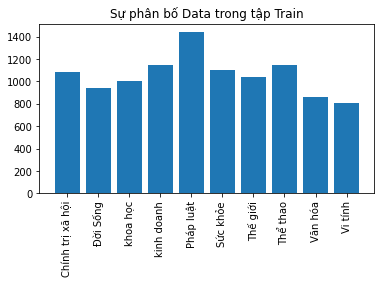

In [18]:
 
# create dataset
height = [1083,938,1001,1148,1444,1098,1038,1142,857,805]
bars = ('Chính trị xã hội', 'Đời Sống', 'khoa học', 'kinh doanh', 'Pháp luật','Sức khỏe','Thế giới','Thể thao','Văn hóa','Vi tính')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(x_pos, bars, rotation = 90)
plt.title("Sự phân bố Data trong tập Train")
plt.subplots_adjust(bottom=0.4, top=0.99)
# Show graphic
plt.show()

Tập Test


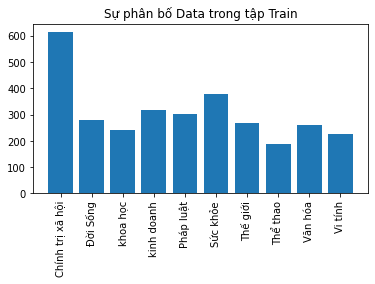

In [19]:
# create dataset
height = [616,280,240,316,303,380,269,187,260,225]
bars = ('Chính trị xã hội', 'Đời Sống', 'khoa học', 'kinh doanh', 'Pháp luật','Sức khỏe','Thế giới','Thể thao','Văn hóa','Vi tính')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(x_pos, bars, rotation = 90)
plt.title("Sự phân bố Data trong tập Train")
plt.subplots_adjust(bottom=0.4, top=0.99)
# Show graphic
plt.show()

### Load tập test sau đó lưu data processed vào file Data_Processed

In [20]:
test_path = 'P:\CS221\Multi-Text-classification\DataSet\Test'
X_test, y_test = GetData_from_Dataset(test_path)

pickle.dump(X_test, open('P:\CS221\Multi-Text-classification\Data_Processed\X_test.pkl', 'wb'))
pickle.dump(y_test, open('P:\CS221\Multi-Text-classification\Data_Processed\y_test.pkl', 'wb'))

100%|██████████| 10/10 [01:00<00:00,  6.03s/it]


### Đưa dữ liệu đã qua xử lý về dạng vector

In [21]:
X_data = pickle.load(open('P:\CS221\Multi-Text-classification\Data_Processed\X_data.pkl', 'rb'))
y_data = pickle.load(open('P:\CS221\Multi-Text-classification\Data_Processed\y_data.pkl', 'rb'))

X_test = pickle.load(open('P:\CS221\Multi-Text-classification\Data_Processed\X_test.pkl', 'rb'))
y_test = pickle.load(open('P:\CS221\Multi-Text-classification\Data_Processed\y_test.pkl', 'rb'))

### Loại bỏ stopword

In [22]:
X_data_remove_stopword = []
X_data_remove_stopword =  X_data
X_test_remove_stopword = []
X_test_remove_stopword = X_test

In [23]:
X_data_remove_stopword

['muốn tốt_nghiệp phải nộp triệu đồng để được dự thi vào cđ sư_phạm bạc liêu sinh_viên đã nhập hộ_khẩu vào tỉnh bạc liêu thông_qua một đường_dây làm hộ_khẩu giả họ đã dự thi trong hai kỳ tuyển_sinh năm_học và các sinh_viên này đa_số quê hà tĩnh nghệ_an thanh_hóa ninh bình và đã trúng_tuyển vào trường cđ sư_phạm bạc liêu gần hai tháng sau khi nhập_học nhà_trường ra thông_báo các sinh_viên này đã vi_phạm_quy_chế tuyển đầu_vào lập_tức sinh_viên này cùng hơn em khác bị công_an mời lên thẩm_vấn và viết tường_trình vụ án được công_an hoàn_tất hồ_sơ những kẻ làm hộ_khẩu giả đã bị khởi_tố trong khi những sinh_viên trên lại được ubnd tỉnh bạc liêu ra quyết_định số ub ngày cho tiếp_tục lại trường để học thế nhưng đến ngày tốt_nghiệp em trên đã không khỏi ngỡ_ngàng khi hay tin nhà_trường quyết_định giữ lại bằng tốt_nghiệp của họ với lý_do hồ_sơ nhập_khẩu có nhiều nghi_vấn chờ các cơ_quan_chức_năng giải_quyết và mọi việc rồi cũng được giải_quyết ngày ubnd tỉnh đã ra quyết_định đồng cho trường cấp 

In [24]:
stopword = {'bị','bởi','cả','các','cái','cần','càng','chỉ','chiếc','cho','chứ','chưa','chuyện','có','có_thể','cứ','của','cùng',
               'cũng','đã','đang','đây','để','đến_nỗi','đều','điều','do','đó','được','dưới','gì','khi','không','là','lại','lên',
               'lúc','mà','mỗi','một_cách','này','nên','nếu','ngay','nhiều','như','nhưng','những','nơi','nữa','phải','qua','ra',
               'rằng','rất','rồi','sau','sẽ','so','sự','tại','theo','thì','trên','trước','từ','từng','và','vẫn','vào',
               'vậy','vì','việc','với','vừa'}
index = 0
for x in X_data_remove_stopword:
    x = ''.join(x).split()
    for item in x:
        if item in stopword:
           x.remove(item)
    x = ' '.join(x)
    x = [x]
    X_data_remove_stopword[index] = ''.join(x)
    index  = index + 1 

In [25]:
X_data_remove_stopword

['muốn tốt_nghiệp nộp triệu đồng dự thi cđ sư_phạm bạc liêu sinh_viên nhập hộ_khẩu tỉnh bạc liêu thông_qua một đường_dây làm hộ_khẩu giả họ dự thi trong hai kỳ tuyển_sinh năm_học sinh_viên đa_số quê hà tĩnh nghệ_an thanh_hóa ninh bình trúng_tuyển trường cđ sư_phạm bạc liêu gần hai tháng nhập_học nhà_trường thông_báo sinh_viên vi_phạm_quy_chế tuyển đầu_vào lập_tức sinh_viên cùng hơn em khác công_an mời thẩm_vấn viết tường_trình vụ án công_an hoàn_tất hồ_sơ kẻ làm hộ_khẩu giả đã bị khởi_tố trong những sinh_viên được ubnd tỉnh bạc liêu quyết_định số ub ngày tiếp_tục trường học thế đến ngày tốt_nghiệp em đã khỏi ngỡ_ngàng khi hay tin nhà_trường quyết_định giữ bằng tốt_nghiệp họ lý_do hồ_sơ nhập_khẩu nhiều nghi_vấn chờ các cơ_quan_chức_năng giải_quyết mọi rồi được giải_quyết ngày ubnd tỉnh đã ra quyết_định đồng trường cấp bằng tốt_nghiệp sinh_viên nói nhưng hoàn lại cho ngân_sách nhà_nước khoản kinh_phí đào_tạo triệu đồng',
 'học_bổng bảng anh học_bổng dành học_sinh ptth việt_nam trường bri

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Thuật toán tfidf ở đây là tính giá trị tf-idf 
#tf (term frequency) là tần số mà term xuất hiện trong 1 document
#idf (inverse document frequency) tần số mà document xuất hiện từ đó trên tổng số document
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram.fit(X_data)
X_data_tfidf_ngram =  tfidf_vect_ngram.transform(X_data)
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)
####################################################################################
tfidf_vect_ngram_remove_stopword = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram_remove_stopword.fit(X_data_remove_stopword)
X_data_remove_stopword_tfidf_ngram = tfidf_vect_ngram_remove_stopword.transform(X_data_remove_stopword)
X_test_remove_stopword_tfidf_ngram = tfidf_vect_ngram_remove_stopword.transform(X_test_remove_stopword)

In [27]:
tfidf_vect_ngram.vocabulary_

{'nộp triệu': 17230,
 'triệu đồng': 21859,
 'dự thi': 6342,
 'thi cđ': 19878,
 'bạc liêu': 1304,
 'tỉnh bạc': 24236,
 'thông_qua một': 20508,
 'một đường_dây': 13460,
 'thi trong': 19895,
 'trong hai': 22034,
 'kỳ tuyển_sinh': 10549,
 'ninh bình': 16389,
 'gần hai': 7341,
 'hai tháng': 7620,
 'hơn em': 8499,
 'vụ án': 26168,
 'đã bị': 27787,
 'bị khởi_tố': 1832,
 'trong những': 22207,
 'những sinh_viên': 16326,
 'ubnd tỉnh': 24757,
 'quyết_định số': 18217,
 'thế đến': 20873,
 'đến ngày': 29049,
 'em đã': 6447,
 'hay tin': 7717,
 'bằng tốt_nghiệp': 1701,
 'các cơ_quan_chức_năng': 3908,
 'được giải_quyết': 28366,
 'ngày ubnd': 14644,
 'ra quyết_định': 18547,
 'cấp bằng': 5400,
 'lại cho': 11561,
 'ngân_sách nhà_nước': 14705,
 'tỉnh bạc liêu': 24237,
 'bảng anh': 1467,
 'dành học_sinh': 5976,
 'anh quốc': 239,
 'trải một': 22854,
 'một cuộc': 12886,
 'tiếng anh': 21472,
 'năm năm': 16822,
 'anh năm': 228,
 'năm ngoài_ra': 16805,
 'trường còn': 22754,
 'còn có': 4302,
 'suất học_bổng': 190

In [28]:
all_feature_name = tfidf_vect_ngram.get_feature_names_out()
for word in all_feature_name:
    indx = tfidf_vect_ngram.vocabulary_.get(word)
    print(f"{word}"+": ",tfidf_vect_ngram.idf_[indx])

abbondanzieri hậu_vệ:  7.625297630667163
abu musab:  7.373983202386256
abu musab al:  7.4311416162262045
ac milan:  5.374005832060667
ac milan inter:  7.699405602820884
ac milan thủ_môn:  7.556304759180211
acid uric:  8.87806059916253
adrian mutu:  7.556304759180211
adriano inter:  6.39315394937453
agribank cup:  7.26862268672843
agu casmir:  7.128860744353271
ahmed korei:  6.897059130295947
ai biết:  5.170604759475658
ai bạn:  7.625297630667163
ai chẳng:  7.49176623804264
ai chịu:  7.1733125069241055
ai còn:  7.373983202386256
ai có:  6.680836021826311
ai có_thể:  6.9685180942780915
ai cũng:  6.600793314152774
ai cập:  5.821703703792105
ai cập cổ:  8.067130382946202
ai cập cổ_đại:  7.779448310494421
ai dám:  6.550782893578114
ai hiểu:  6.897059130295947
ai hết:  7.006258422260939
ai khác:  6.575475506168485
ai không:  7.49176623804264
ai là:  7.128860744353271
ai làm:  6.313111241700994
ai mua:  7.219832522558998
ai muốn:  5.894907107815399
ai một:  7.31991598111598
ai nghĩ:  6.393153

### LABEL ENCODER Ta sẽ chuyển nhãn dữ liệu về dạng số phục vụ quá trình huấn luyện. Nhãn của chúng ta đang có dạng văn bản như sau: ['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh', 'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa', 'Vi tinh']

In [29]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)

encoder.classes_

array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
       'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
       'Vi tinh'], dtype='<U16')

### Xây dựng model 

In [30]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib as mpl

def train_model(classifier, X_data, y_data, X_test, y_test):       
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.25, random_state=42)
    classifier.fit(X_train, y_train)
    test_predictions = classifier.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                                    display_labels = [ 'Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
                                                                        'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
                                                                        'Vi tinh'])
    cm_display.plot()
    plt.xticks(rotation=90)
    plt.show()
    print(metrics.classification_report(y_test, test_predictions, target_names=encoder.classes_))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))
    print(" Test Recall: ",metrics.recall_score(y_test,test_predictions,average='macro'))
    print("Precision: ", precision_score(y_test,test_predictions,average='micro'))
    print("f1_score:",f1_score(y_test,test_predictions,average='micro'))

## không loại bỏ stopword

Naive Bayes

In [31]:
import joblib

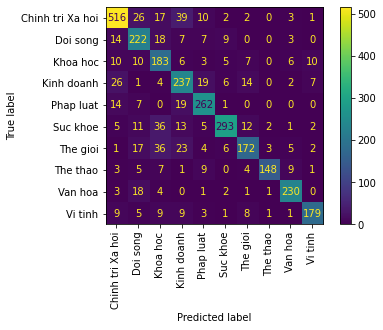

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.86      0.84      0.85       616
        Doi song       0.69      0.79      0.74       280
        Khoa hoc       0.58      0.76      0.66       240
      Kinh doanh       0.67      0.75      0.71       316
       Phap luat       0.81      0.86      0.84       303
        Suc khoe       0.90      0.77      0.83       380
        The gioi       0.78      0.64      0.70       269
        The thao       0.95      0.79      0.87       187
         Van hoa       0.88      0.88      0.88       260
         Vi tinh       0.89      0.80      0.84       225

        accuracy                           0.79      3076
       macro avg       0.80      0.79      0.79      3076
    weighted avg       0.81      0.79      0.80      3076

Test accuracy:  0.793888166449935
 Test Recall:  0.7889778575644579
Precision:  0.793888166449935
f1_score: 0.793888166449935


['P:\\CS221\\Multi-Text-classification\\Model\\MultinomialNB.sav']

In [32]:
from sklearn import naive_bayes
navie = naive_bayes.MultinomialNB()
train_model(navie, X_data_tfidf_ngram, y_data_n, X_test_tfidf_ngram, y_test_n)
joblib.dump(navie,"P:\CS221\Multi-Text-classification\Model\MultinomialNB.sav")

KNN

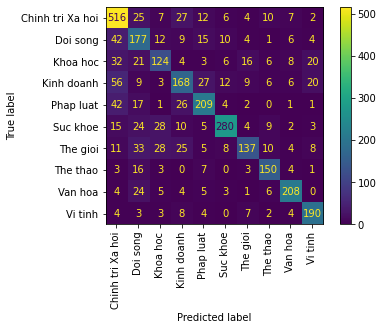

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.71      0.84      0.77       616
        Doi song       0.51      0.63      0.56       280
        Khoa hoc       0.58      0.52      0.55       240
      Kinh doanh       0.60      0.53      0.56       316
       Phap luat       0.72      0.69      0.70       303
        Suc khoe       0.85      0.74      0.79       380
        The gioi       0.73      0.51      0.60       269
        The thao       0.75      0.80      0.78       187
         Van hoa       0.83      0.80      0.82       260
         Vi tinh       0.76      0.84      0.80       225

        accuracy                           0.70      3076
       macro avg       0.70      0.69      0.69      3076
    weighted avg       0.71      0.70      0.70      3076

Test accuracy:  0.701885565669701
 Test Recall:  0.690060567542796
Precision:  0.701885565669701
f1_score: 0.701885565669701


In [33]:
from sklearn import neighbors
train_model(neighbors.KNeighborsClassifier(n_neighbors=10, p=2), X_data_tfidf_ngram, y_data_n, X_test_tfidf_ngram, y_test_n)

 VSM 

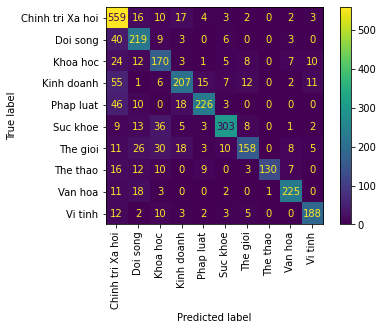

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.71      0.91      0.80       616
        Doi song       0.67      0.78      0.72       280
        Khoa hoc       0.60      0.71      0.65       240
      Kinh doanh       0.76      0.66      0.70       316
       Phap luat       0.86      0.75      0.80       303
        Suc khoe       0.89      0.80      0.84       380
        The gioi       0.81      0.59      0.68       269
        The thao       0.99      0.70      0.82       187
         Van hoa       0.88      0.87      0.87       260
         Vi tinh       0.86      0.84      0.85       225

        accuracy                           0.78      3076
       macro avg       0.80      0.76      0.77      3076
    weighted avg       0.79      0.78      0.78      3076

Test accuracy:  0.7753576072821846
 Test Recall:  0.7579737954105451
Precision:  0.7753576072821846
f1_score: 0.7753576072821846


In [34]:
from sklearn import svm
train_model(svm.SVC(), X_data_tfidf_ngram, y_data_n, X_test_tfidf_ngram, y_test_n)

##  loại bỏ stopword

 Bayes Naive

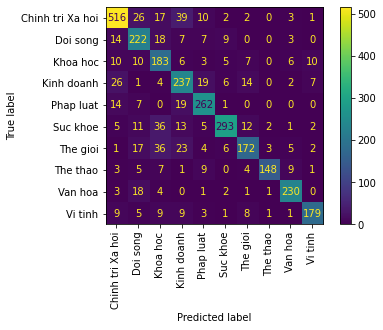

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.86      0.84      0.85       616
        Doi song       0.69      0.79      0.74       280
        Khoa hoc       0.58      0.76      0.66       240
      Kinh doanh       0.67      0.75      0.71       316
       Phap luat       0.81      0.86      0.84       303
        Suc khoe       0.90      0.77      0.83       380
        The gioi       0.78      0.64      0.70       269
        The thao       0.95      0.79      0.87       187
         Van hoa       0.88      0.88      0.88       260
         Vi tinh       0.89      0.80      0.84       225

        accuracy                           0.79      3076
       macro avg       0.80      0.79      0.79      3076
    weighted avg       0.81      0.79      0.80      3076

Test accuracy:  0.793888166449935
 Test Recall:  0.7889778575644579
Precision:  0.793888166449935
f1_score: 0.793888166449935


In [35]:
train_model(naive_bayes.MultinomialNB(), X_data_remove_stopword_tfidf_ngram, y_data_n, X_test_remove_stopword_tfidf_ngram, y_test_n)

KNN

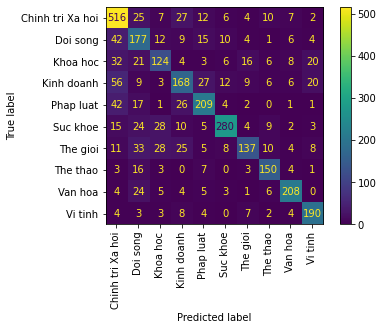

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.71      0.84      0.77       616
        Doi song       0.51      0.63      0.56       280
        Khoa hoc       0.58      0.52      0.55       240
      Kinh doanh       0.60      0.53      0.56       316
       Phap luat       0.72      0.69      0.70       303
        Suc khoe       0.85      0.74      0.79       380
        The gioi       0.73      0.51      0.60       269
        The thao       0.75      0.80      0.78       187
         Van hoa       0.83      0.80      0.82       260
         Vi tinh       0.76      0.84      0.80       225

        accuracy                           0.70      3076
       macro avg       0.70      0.69      0.69      3076
    weighted avg       0.71      0.70      0.70      3076

Test accuracy:  0.701885565669701
 Test Recall:  0.690060567542796
Precision:  0.701885565669701
f1_score: 0.701885565669701


In [36]:
from sklearn import neighbors
train_model(neighbors.KNeighborsClassifier(n_neighbors=10, p=2), X_data_remove_stopword_tfidf_ngram, y_data_n, X_test_remove_stopword_tfidf_ngram, y_test_n)

SVM

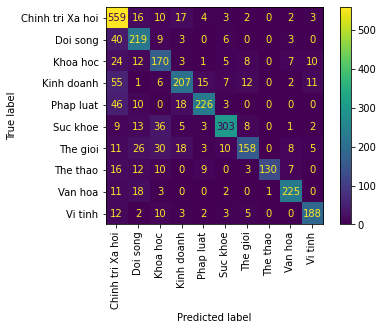

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.71      0.91      0.80       616
        Doi song       0.67      0.78      0.72       280
        Khoa hoc       0.60      0.71      0.65       240
      Kinh doanh       0.76      0.66      0.70       316
       Phap luat       0.86      0.75      0.80       303
        Suc khoe       0.89      0.80      0.84       380
        The gioi       0.81      0.59      0.68       269
        The thao       0.99      0.70      0.82       187
         Van hoa       0.88      0.87      0.87       260
         Vi tinh       0.86      0.84      0.85       225

        accuracy                           0.78      3076
       macro avg       0.80      0.76      0.77      3076
    weighted avg       0.79      0.78      0.78      3076

Test accuracy:  0.7753576072821846
 Test Recall:  0.7579737954105451
Precision:  0.7753576072821846
f1_score: 0.7753576072821846


In [37]:
from sklearn import svm
train_model(svm.SVC(), X_data_remove_stopword_tfidf_ngram, y_data_n, X_test_remove_stopword_tfidf_ngram, y_test_n)

## Test thử 

In [38]:
def Test(text,classifier):
    for i in text:
        test = tfidf_vect_ngram.transform(i)
        cmt = classifier.predict(test)
        if cmt == [0]:
            print("Chính trị xã hội")
        elif cmt == [1]: 
            print("Đời Sống")
        elif cmt == [2]: 
            print("Khoa học")
        elif cmt == [3]: 
            print("Kinh doanh")
        elif cmt == [4]: 
            print("Pháp Luật")
        elif cmt == [5]: 
            print("Sức Khỏe")
        elif cmt == [6]: 
            print("Thế Giới")
        elif cmt == [7]: 
            print("Thể Thao")
        elif cmt == [8]: 
            print("Văn Hóa")
        elif cmt == [9]: 
            print("Vi Tính")
        print(cmt)

In [39]:
loaded_model = joblib.load("P:\CS221\Multi-Text-classification\Model\MultinomialNB.sav")


In [40]:
text = [["Tối hôm qua messi đã ghi bàn và khẳng định anh không ở đây để về nước sớm"]]
Test(text,loaded_model)


Thể Thao
[7]


In [41]:
text = [["Chiếc máy tính này được mua với giá rất cao, nó có thể xử lí nhiều tác vụ cùng 1 lúc"]]
Test(text,loaded_model)


Kinh doanh
[3]


In [42]:
txt = [["Vũ kiệt đi cướp nhà băng sa đó bị phạt 20 năm tù giam"]]
Test(txt,loaded_model)

Pháp Luật
[4]
